# Calculation of sea ice cover for each model

## Objective

The objective here is to extract the sea ice variable from the interpolated files and calculate the average monthly sea ice area over the entire reference period (1995-2014). These values ​​must then be extracted for further analysis. A quick visualization of the sea ice area in map form will also be carried out to quickly see if certain models appear to be poorly simulating sea ice visually.

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-07-29T08:39:22.732558+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-55-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Chemin absolu vers le dossier codes_ORL_evaluation
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout du chemin au sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_SeaIce_project


In [3]:
from module import *

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [4]:
%watermark --iversions

netCDF4   : 1.7.2
xesmf     : 0.8.8
cartopy   : 0.24.0
cdo       : 1.6.1
xarray    : 2025.1.1
matplotlib: 3.10.0
seaborn   : 0.13.2
watermark : 2.5.0
numpy     : 2.0.2
pandas    : 2.2.3
skimage   : 0.25.0
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
csv       : 1.0



### Creating a list with all historical files

In [16]:
files = os.listdir("/home/jovyan/private-storage/output_data/sea_ice_interp/")

nc_files = [filename for filename in files if filename.endswith(".nc")]
nc_files

['BCC-CSM2-MR_hist_reprojete.nc',
 'CAMS-CSM1-0_hist_reprojete.nc',
 'CESM2_hist_reprojete.nc',
 'CESM2-WACCM_hist_reprojete.nc',
 'CNRM-CM6-1_hist_reprojete.nc',
 'CNRM-CM6-1-HR_hist_reprojete.nc',
 'CanESM5_hist_reprojete.nc',
 'FGOALS-f3-L_hist_reprojete.nc',
 'FIO-ESM-2-0_hist_reprojete.nc',
 'GFDL-CM4_hist_reprojete.nc',
 'GFDL-ESM4_hist_reprojete.nc',
 'INM-CM4-8_hist_reprojete.nc',
 'INM-CM5-0_hist_reprojete.nc',
 'IPSL-CM6A-LR_hist_reprojete.nc',
 'MIROC-ES2L_hist_reprojete.nc',
 'MIROC6_hist_reprojete.nc',
 'MPI-ESM1-2-HR_hist_reprojete.nc',
 'MRI-ESM2-0_hist_reprojete.nc',
 'NESM3_hist_reprojete.nc']

### Northern Hemisphere

### Displaying sea ice cover maps and creating a dictionary with numerical area values

In [12]:
path_BCC_2 = "/home/jovyan/private-storage/output_data/sea_ice_interp/BCC-CSM2-MR_hist_reprojete2.nc"
BCC_2 = xr.open_dataset(path_BCC_2)

In [13]:
BCC_2

<xarray.Dataset> Size: 513MB
Dimensions:  (time: 1980, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type     |S7 7B ...
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    siconc   (time, lat, lon) float32 513MB ...
Attributes:
    regrid_method:  nearest_s2d

In [9]:
path_CAMS = "/home/jovyan/private-storage/output_data/sea_ice_interp/CAMS-CSM1-0_hist_reprojete.nc"
CAMS = xr.open_dataset(path_CAMS)
CAMS

<xarray.Dataset> Size: 515MB
Dimensions:             (vertices: 4, lat: 180, lon: 360, time: 1980)
Coordinates:
  * time                (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16...
    type                |S7 7B ...
  * lon                 (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * lat                 (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (vertices, lat, lon) float32 1MB ...
    vertices_longitude  (vertices, lat, lon) float32 1MB ...
    siconc              (time, lat, lon) float32 513MB ...
Attributes:
    regrid_method:  nearest_s2d

In [11]:
path_CESM2 = "/home/jovyan/private-storage/output_data/sea_ice_interp/CESM2_hist_reprojete.nc"
CESM2 = xr.open_dataset(path_CESM2)
CESM2

<xarray.Dataset> Size: 515MB
Dimensions:   (time: 1980, lat: 180, lon: 360, nvertices: 4)
Coordinates:
  * time      (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon       (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: nvertices
Data variables:
    siconc    (time, lat, lon) float32 513MB ...
    lat_bnds  (nvertices, lat, lon) float32 1MB ...
    lon_bnds  (nvertices, lat, lon) float32 1MB ...
Attributes:
    regrid_method:  nearest_s2d

#### Sftlf < 50

La variable 'siconc' est en %. Conversion en fraction.


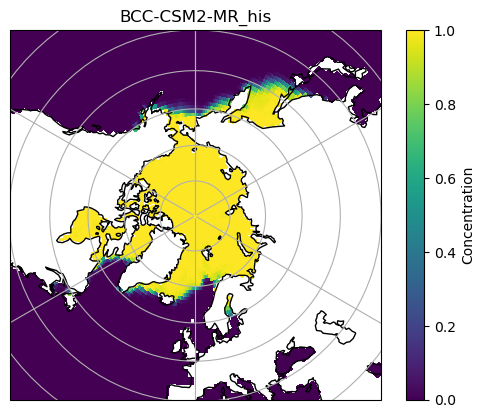

La variable 'siconc' est en %. Conversion en fraction.


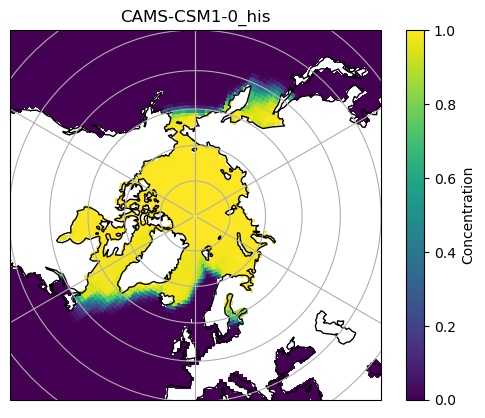

La variable 'siconc' est en %. Conversion en fraction.


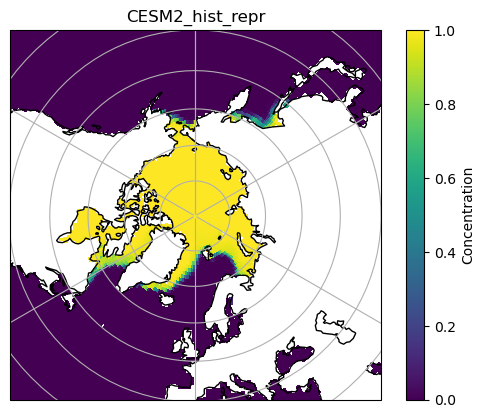

La variable 'siconc' est en %. Conversion en fraction.


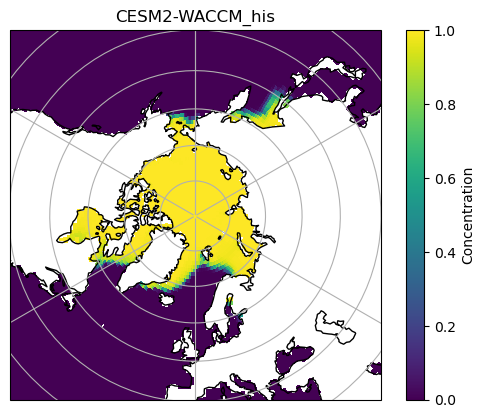

La variable 'siconc' est en %. Conversion en fraction.


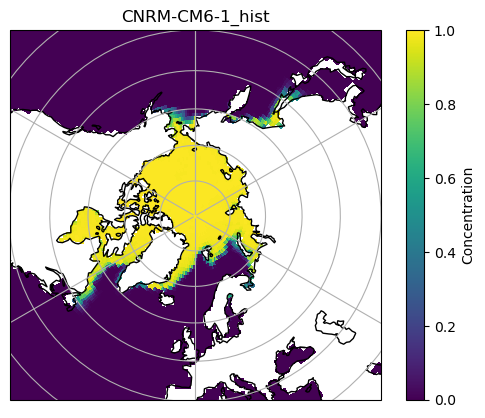

La variable 'siconc' est en %. Conversion en fraction.


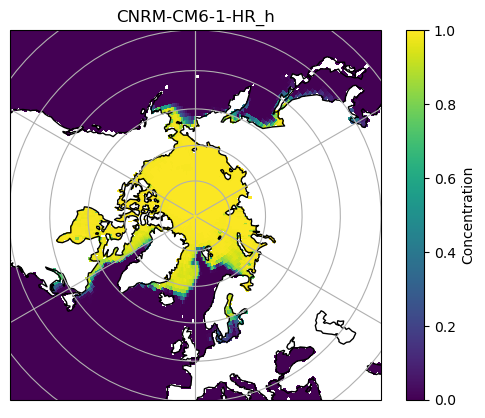

La variable 'siconc' est en %. Conversion en fraction.


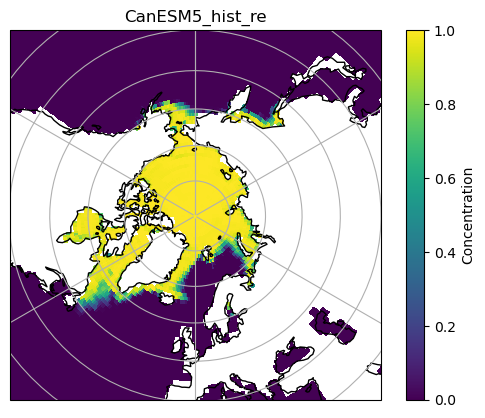

La variable 'siconc' est en %. Conversion en fraction.


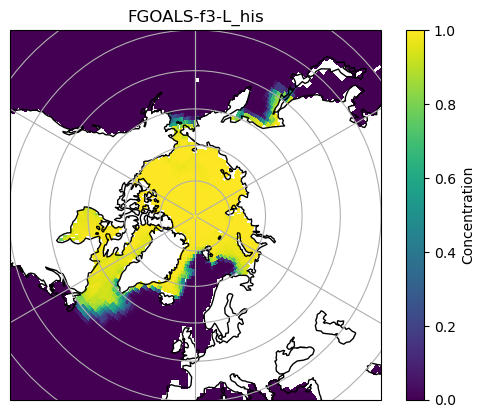

La variable 'siconc' est en %. Conversion en fraction.


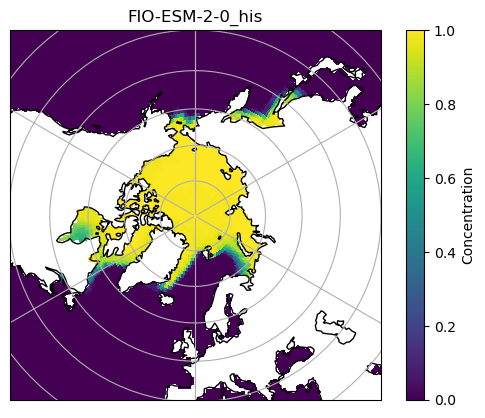

La variable 'siconc' est en %. Conversion en fraction.


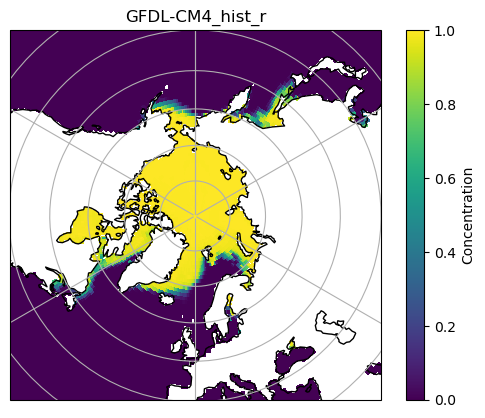

La variable 'siconc' est en %. Conversion en fraction.


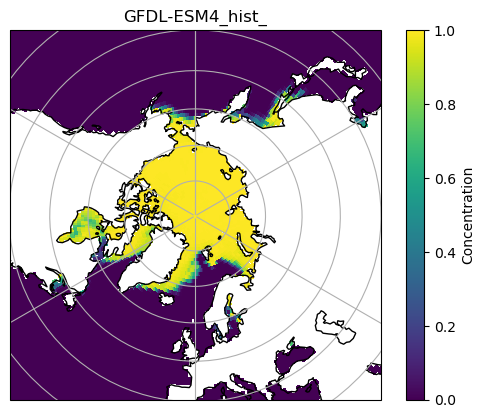

La variable 'siconc' est en %. Conversion en fraction.


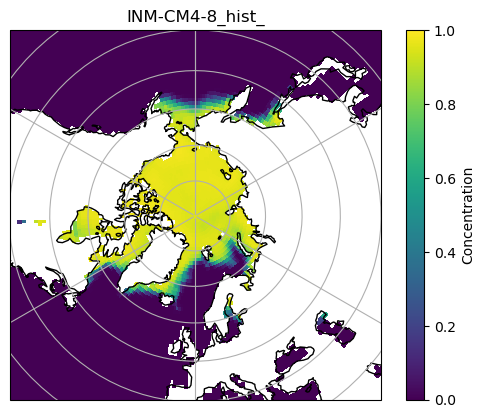

La variable 'siconc' est en %. Conversion en fraction.


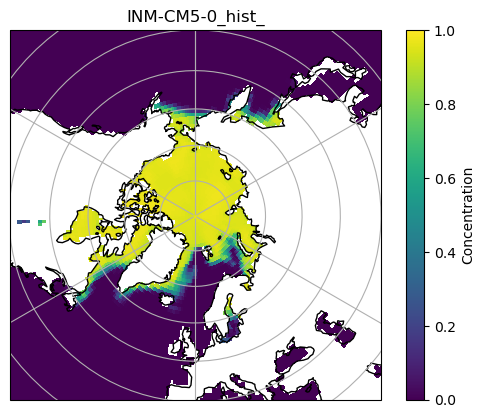

La variable 'siconc' est en %. Conversion en fraction.


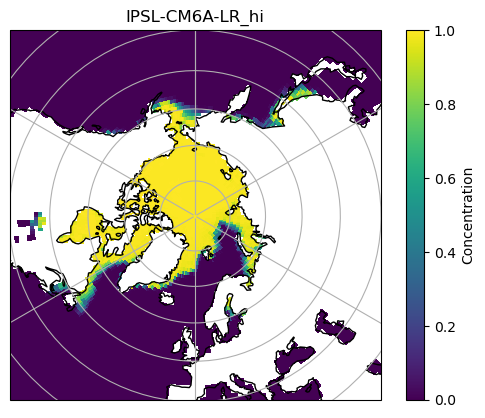

La variable 'siconc' est en %. Conversion en fraction.


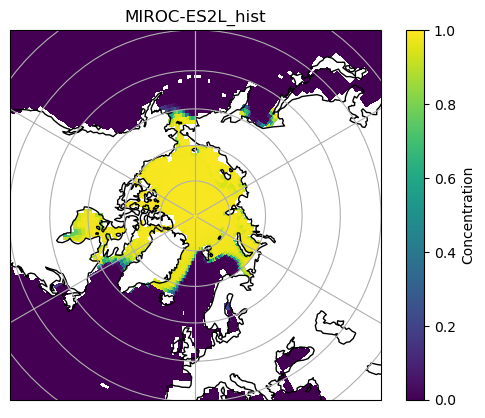

La variable 'siconc' est en %. Conversion en fraction.


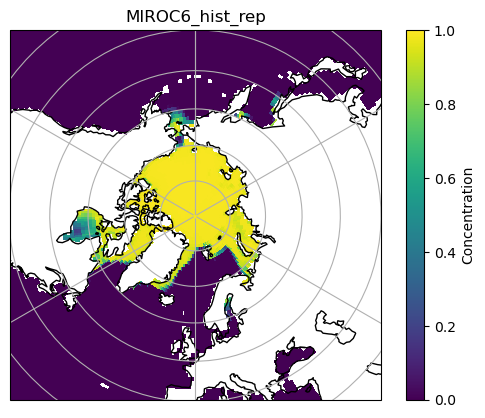

La variable 'siconc' est en %. Conversion en fraction.


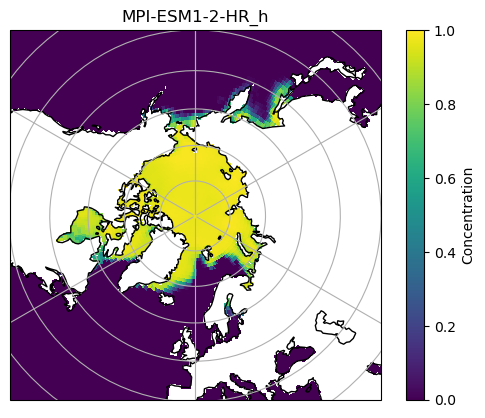

La variable 'siconc' est en %. Conversion en fraction.


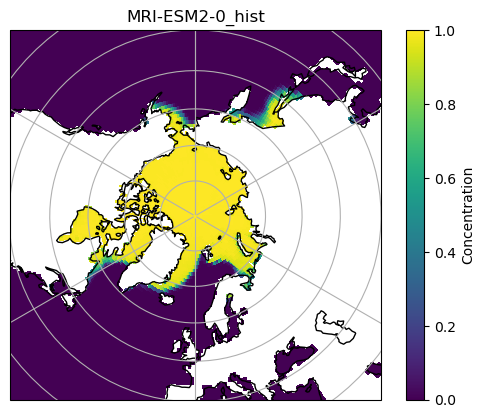

La variable 'siconc' est en %. Conversion en fraction.


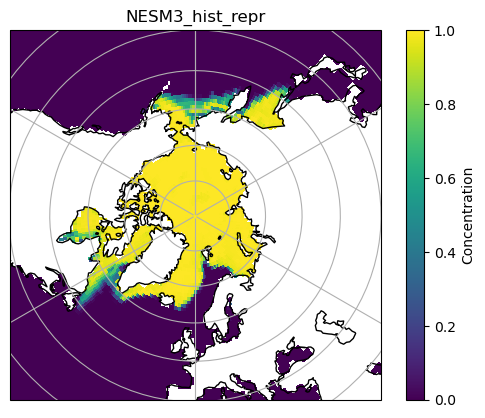

In [17]:
seaice_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_siconc = os.path.join("/home/jovyan/private-storage/output_data/sea_ice_interp/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/output_data/areacella_recalcule", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", files.replace("hist", "sftlf"))
                                 
    # use of functions defined in the module
    ds_siconc, ds_area, ds_sftlf = get_data(path_siconc, path_areacella, path_sftlf)
    siconc, seaice_cover, monthly_mean = extraction_variable_and_monthly_mean_nh(ds_siconc, sftlf=ds_sftlf["sftlf"])
    areacella = ds_area["cell_area"]
    seaice_cover_km2 = seaice_surface_calculation(seaice_cover, areacella)
    seaice_cover_dict[model_name] = seaice_cover_km2

    plot_seaice_cover_basic_nh(siconc, title=files[:15])
    
    ds_siconc.close()
    ds_area.close()

In [7]:
print(siconc.max().item())
print(siconc.min().item())

0.9999908208847046
0.0


In [18]:
print(seaice_cover_dict)

{'BCC-CSM2-MR': <xarray.DataArray (month: 12)> Size: 96B
array([15760250.19198789, 16544598.10716452, 16919724.04021854,
       16223758.52440413, 14703480.03097929, 12865222.73154265,
       10415377.42094139,  8566894.13633302,  8092638.93034431,
        9570801.40498387, 11571982.97954735, 14029435.22108733])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S7 7B b'sea_ice', 'CAMS-CSM1-0': <xarray.DataArray (month: 12)> Size: 96B
array([19342778.92728753, 20604963.08120481, 20755510.92403318,
       19757468.35434623, 17318923.5677375 , 14478513.65618274,
       11584790.36376636,  8891286.87269326,  8646468.44751152,
       10420986.47590135, 13540336.10525927, 16875073.22737926])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S7 7B b'sea_ice', 'CESM2': <xarray.DataArray (month: 12)> Size: 96B
array([13052328.48182146, 13727015.69815804, 13952383.76195857,
       13833936.94327213, 12922923.69197276, 11767790

In [19]:
# save the dictionary as a csv file
dictionnaire_to_csv(seaice_cover_dict, "/home/jovyan/private-storage/output_data/seaice_cover_per_model50.csv")

✅ Fichier CSV sauvegardé : /home/jovyan/private-storage/output_data/seaice_cover_per_model50.csv


#### Sftlf < 25

La variable 'siconc' est en %. Conversion en fraction.


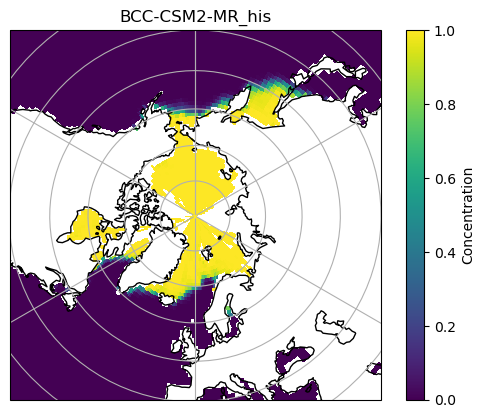

La variable 'siconc' est en %. Conversion en fraction.


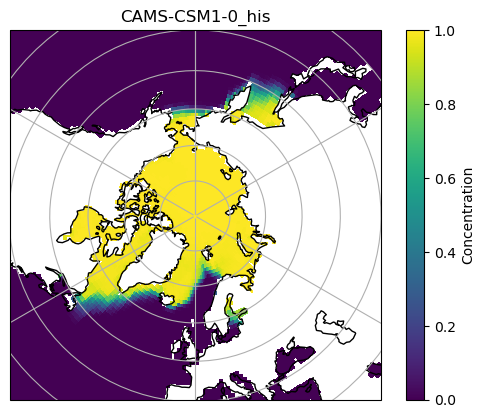

La variable 'siconc' est en %. Conversion en fraction.


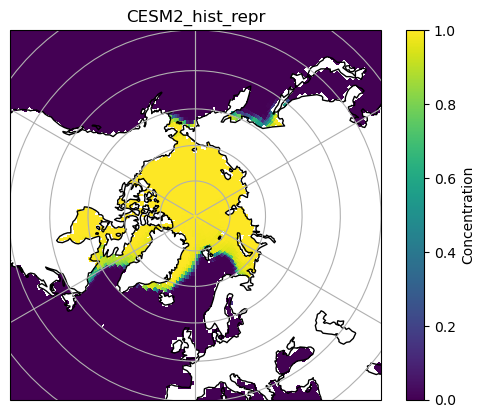

La variable 'siconc' est en %. Conversion en fraction.


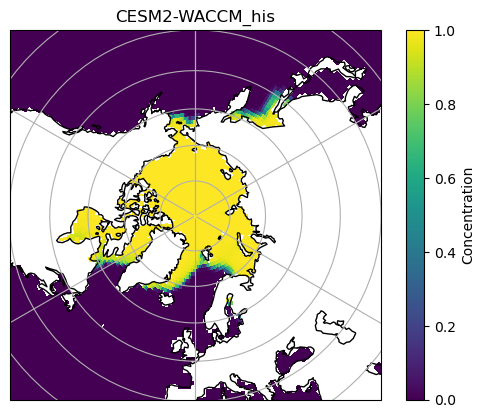

La variable 'siconc' est en %. Conversion en fraction.


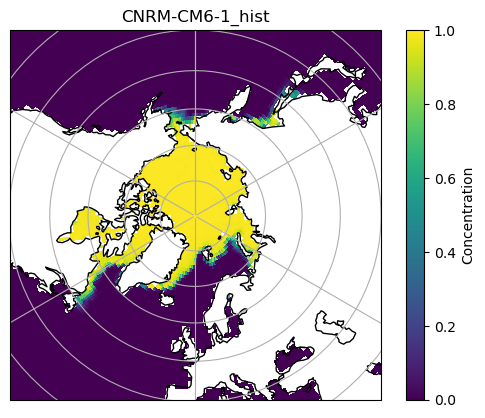

La variable 'siconc' est en %. Conversion en fraction.


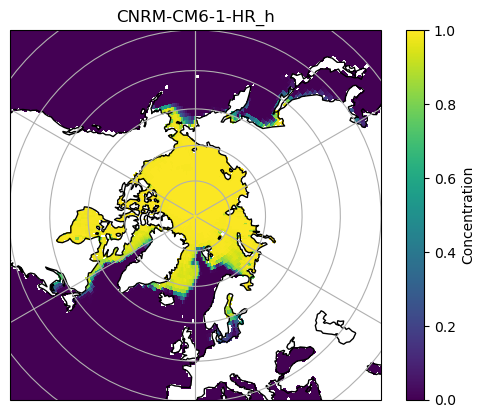

La variable 'siconc' est en %. Conversion en fraction.


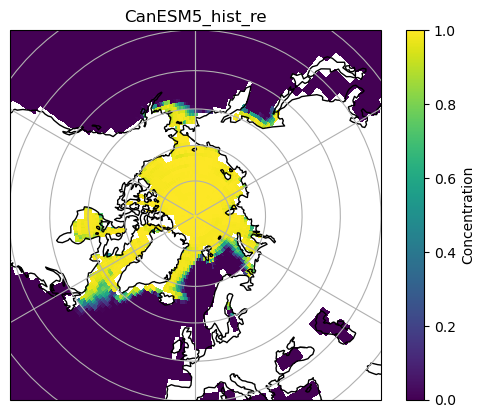

La variable 'siconc' est en %. Conversion en fraction.


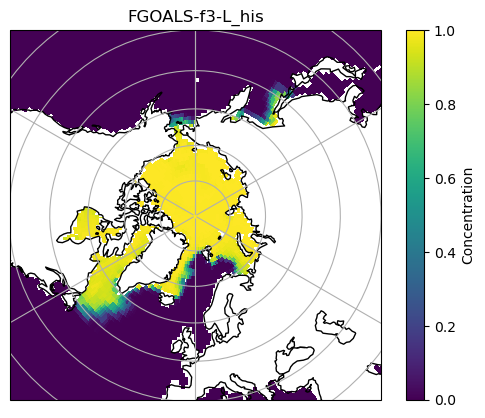

La variable 'siconc' est en %. Conversion en fraction.


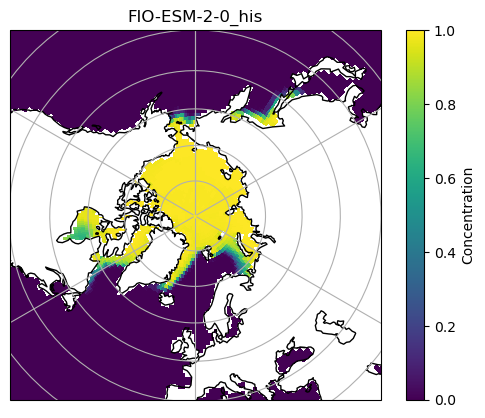

La variable 'siconc' est en %. Conversion en fraction.


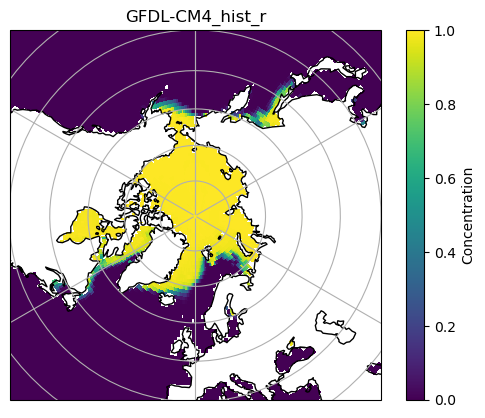

La variable 'siconc' est en %. Conversion en fraction.


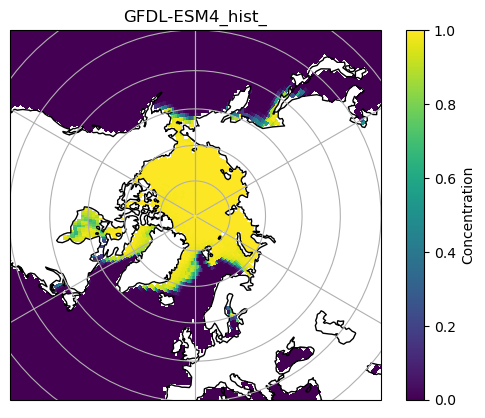

La variable 'siconc' est en %. Conversion en fraction.


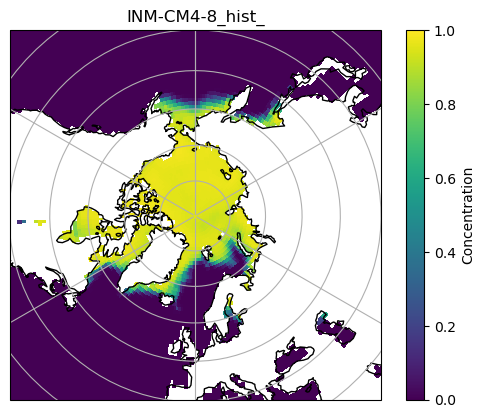

La variable 'siconc' est en %. Conversion en fraction.


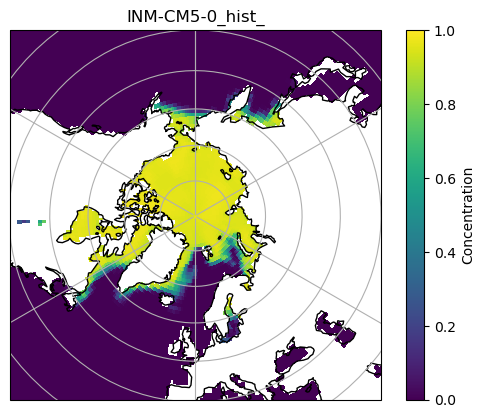

La variable 'siconc' est en %. Conversion en fraction.


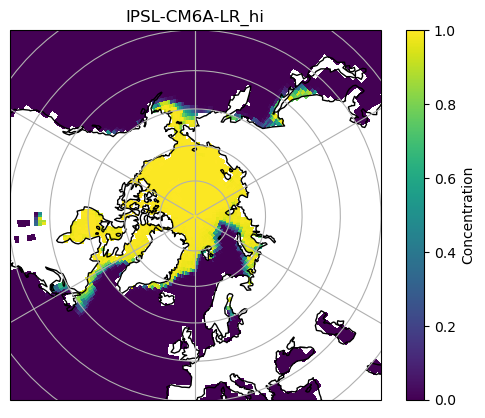

La variable 'siconc' est en %. Conversion en fraction.


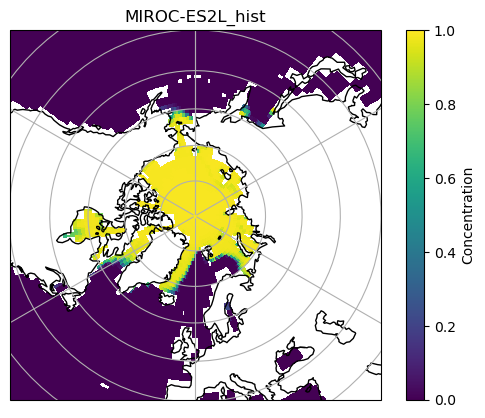

La variable 'siconc' est en %. Conversion en fraction.


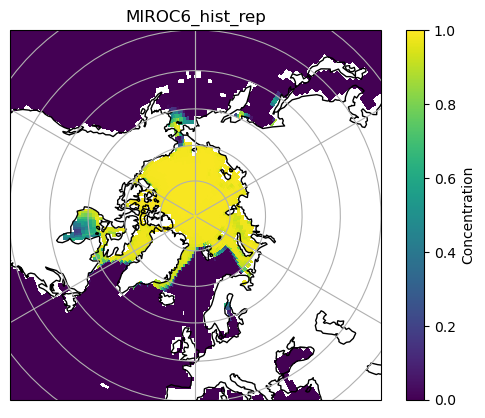

La variable 'siconc' est en %. Conversion en fraction.


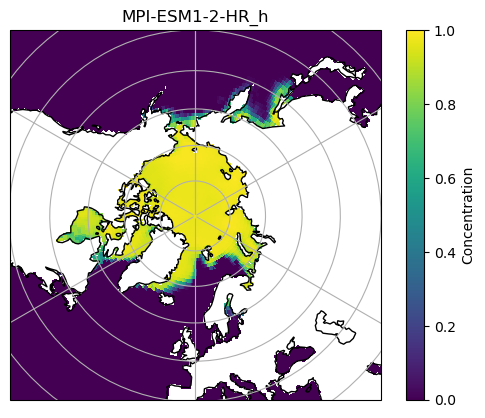

La variable 'siconc' est en %. Conversion en fraction.


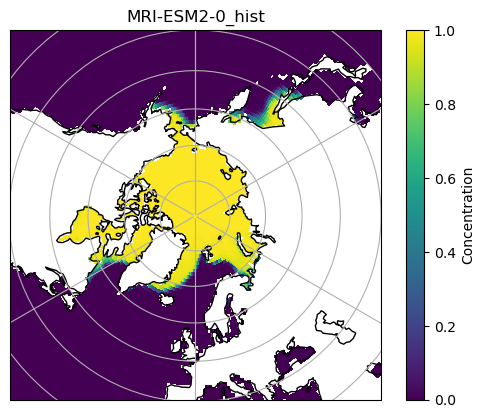

La variable 'siconc' est en %. Conversion en fraction.


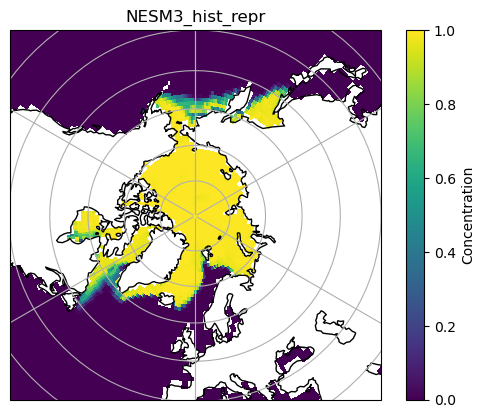

In [6]:
seaice_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_siconc = os.path.join("/home/jovyan/private-storage/output_data/sea_ice_interp/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/output_data/areacella_recalcule", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", files.replace("hist", "sftlf"))
                                 
    # use of functions defined in the module
    ds_siconc, ds_area, ds_sftlf = get_data(path_siconc, path_areacella, path_sftlf)
    siconc, seaice_cover, monthly_mean = extraction_variable_and_monthly_mean_nh(ds_siconc, sftlf=ds_sftlf["sftlf"])
    areacella = ds_area["cell_area"]
    seaice_cover_km2 = seaice_surface_calculation(seaice_cover, areacella)
    seaice_cover_dict[model_name] = seaice_cover_km2

    plot_seaice_cover_basic_nh(siconc, title=files[:15])
    
    ds_siconc.close()
    ds_area.close()

In [7]:
print(seaice_cover_dict)

{'BCC-CSM2-MR': <xarray.DataArray (month: 12)> Size: 96B
array([10580561.87819389, 11281979.61654092, 11616613.00193484,
       11046480.42761724,  9777130.90863507,  8235567.5401962 ,
        5969503.1874138 ,  4456923.6560559 ,  3983552.5210401 ,
        5210927.78242677,  6982978.79415526,  9137182.40362037])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S7 7B b'sea_ice', 'CAMS-CSM1-0': <xarray.DataArray (month: 12)> Size: 96B
array([18474491.04010627, 19717481.95489088, 19876222.39256661,
       18897373.06201221, 16588610.5817328 , 13935288.10162321,
       11097678.25251076,  8603986.21294306,  8389865.82127445,
       10003508.88679308, 13031287.18816615, 16112949.78991053])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S7 7B b'sea_ice', 'CESM2': <xarray.DataArray (month: 12)> Size: 96B
array([12338817.47963759, 12972820.93981412, 13185066.40414486,
       13066619.58545841, 12260179.2418464 , 11217475

In [8]:
# save the dictionary as a csv file
dictionnaire_to_csv(seaice_cover_dict, "/home/jovyan/private-storage/output_data/seaice_cover_per_model25.csv")

✅ Fichier CSV sauvegardé : /home/jovyan/private-storage/output_data/seaice_cover_per_model25.csv


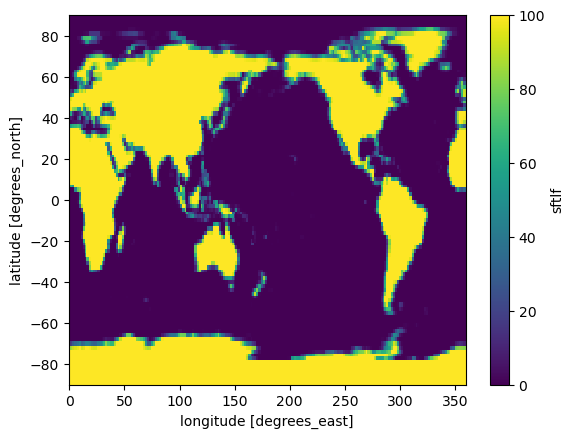

In [10]:
ds_sftlf['sftlf'].plot()

In [14]:
sftlf = ds_sftlf['sftlf']

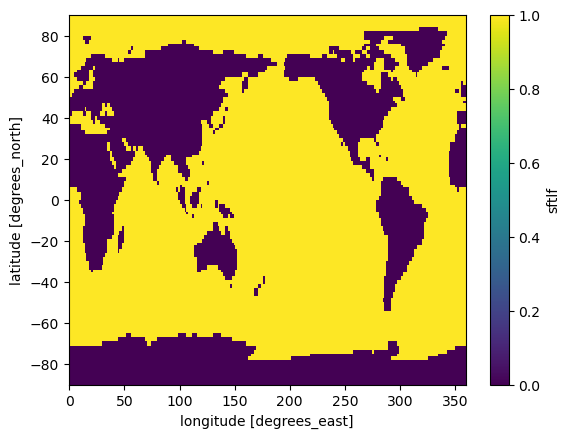

In [20]:
sftlf_50 = (sftlf < 50).astype(int)
sftlf_50.plot()

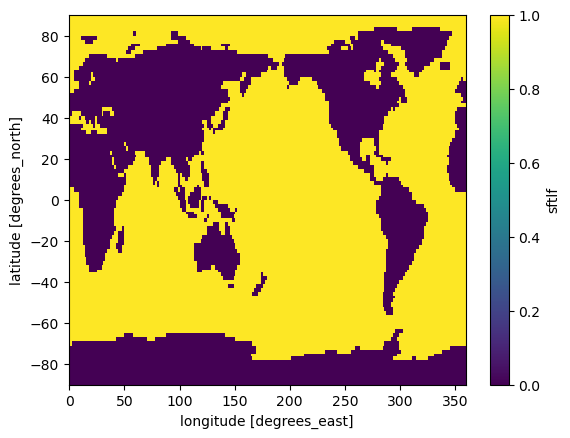

In [21]:
sftlf_20 = (sftlf < 20).astype(int)
sftlf_20.plot()

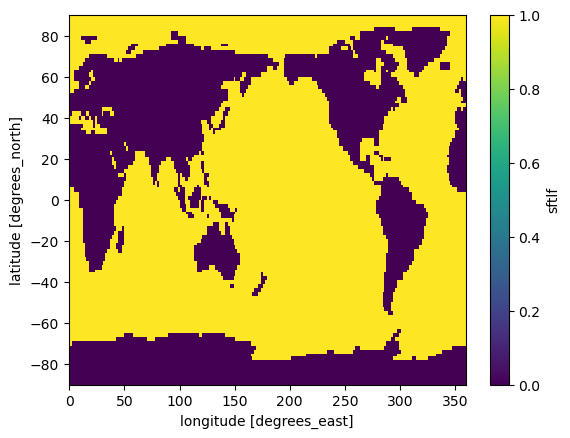

In [22]:
sftlf_25 = (sftlf < 25).astype(int)
sftlf_25.plot()

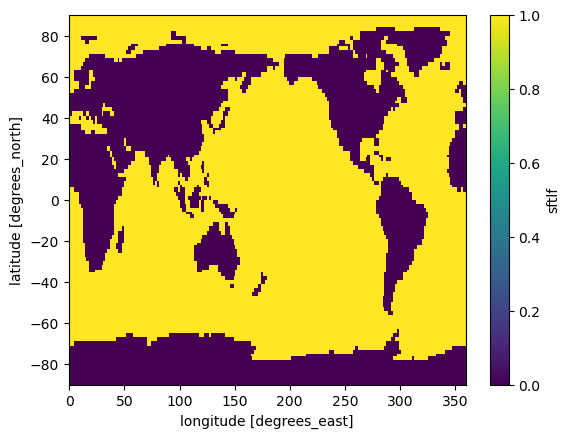

In [25]:
sftlf_30 = (sftlf < 30).astype(int)
sftlf_30.plot()

This dictionary displays all the values of sea ice area for each model and month.

In [8]:
# save the dictionary as a csv file
dictionnaire_to_csv(seaice_cover_dict, "/home/jovyan/private-storage/output_data/seaice_cover_per_model.csv")

✅ Fichier CSV sauvegardé : /home/jovyan/private-storage/output_data/seaice_cover_per_model.csv


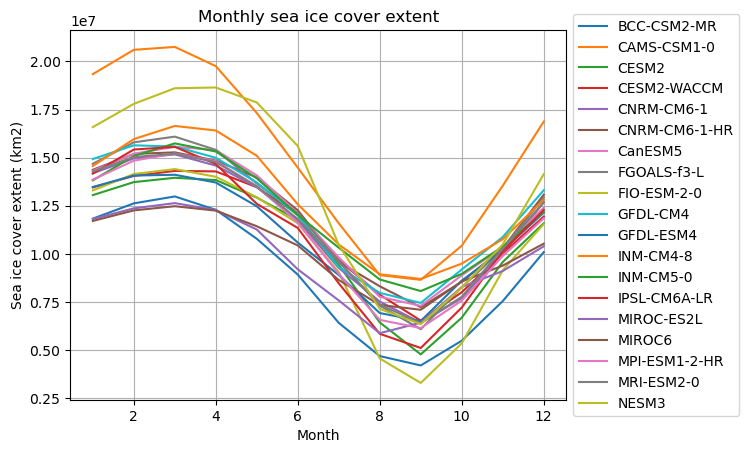

In [8]:
# plot the sea ice cover extent for all the models
for model, values in seaice_cover_dict.items():
    values.plot(label=model)

plt.title("Monthly sea ice cover extent")
plt.xlabel("Month")
plt.ylabel("Sea ice cover extent (km2)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

### Southern Hemisphere

### Displaying sea ice cover maps and creating a dictionary with numerical area values

La variable 'siconc' est en %. Conversion en fraction.


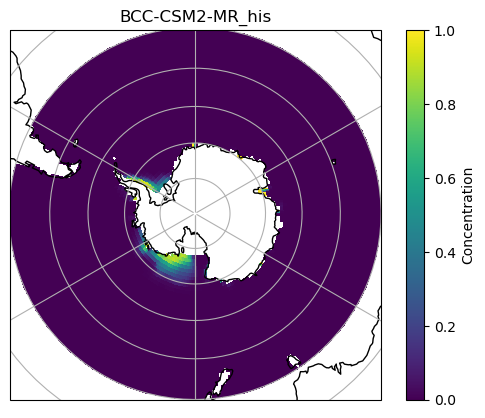

La variable 'siconc' est en %. Conversion en fraction.


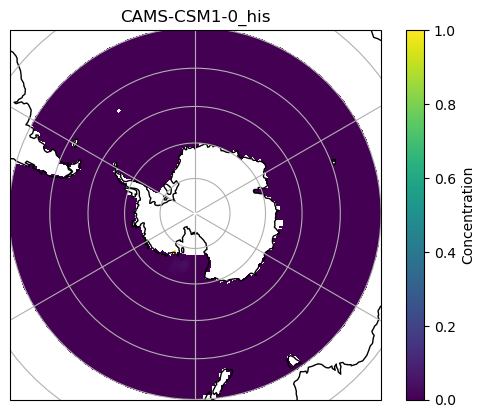

La variable 'siconc' est en %. Conversion en fraction.


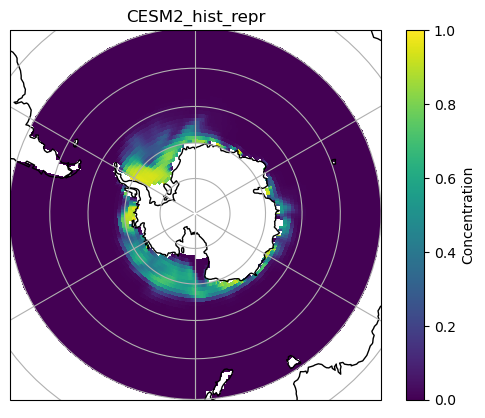

La variable 'siconc' est en %. Conversion en fraction.


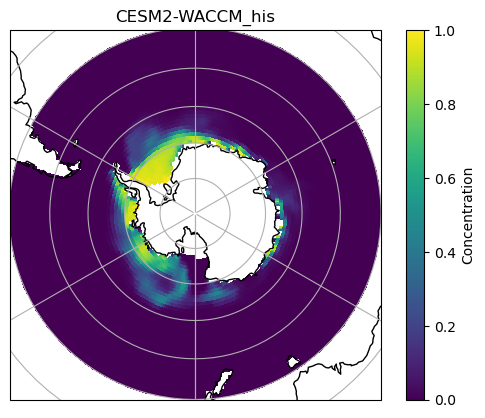

La variable 'siconc' est en %. Conversion en fraction.


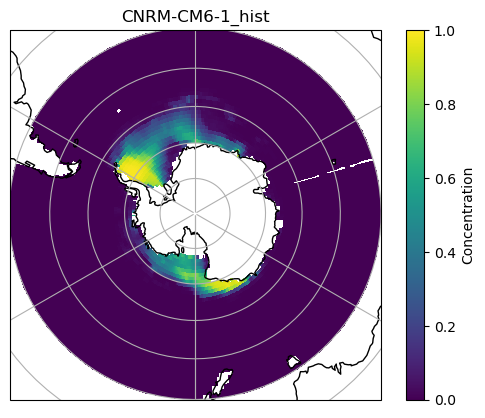

La variable 'siconc' est en %. Conversion en fraction.


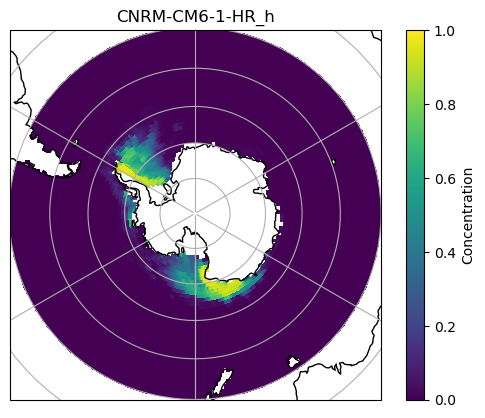

La variable 'siconc' est en %. Conversion en fraction.


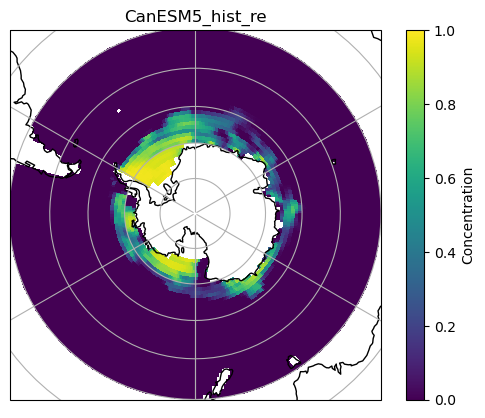

La variable 'siconc' est en %. Conversion en fraction.


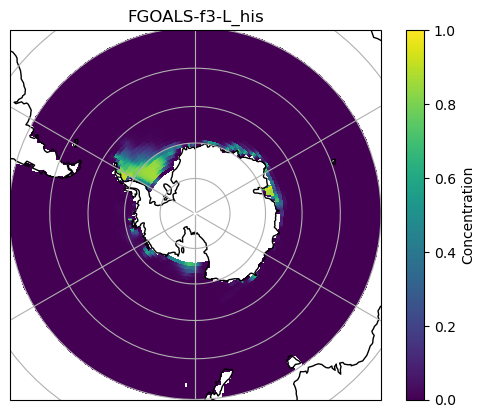

La variable 'siconc' est en %. Conversion en fraction.


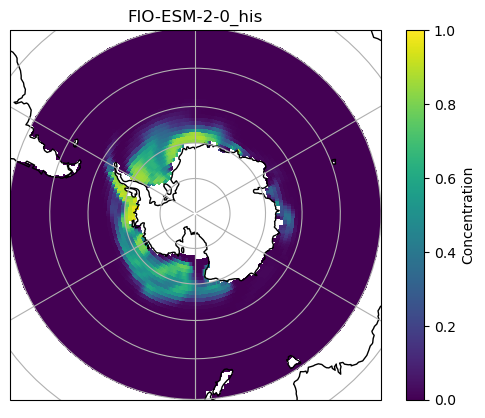

La variable 'siconc' est en %. Conversion en fraction.


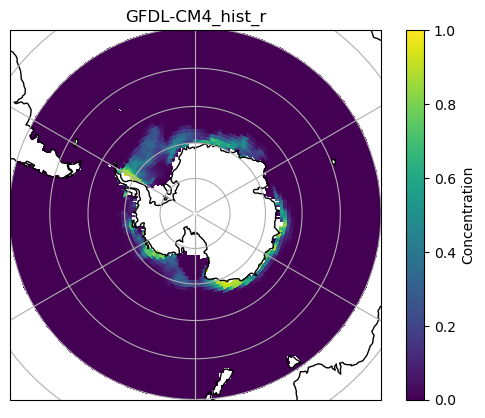

La variable 'siconc' est en %. Conversion en fraction.


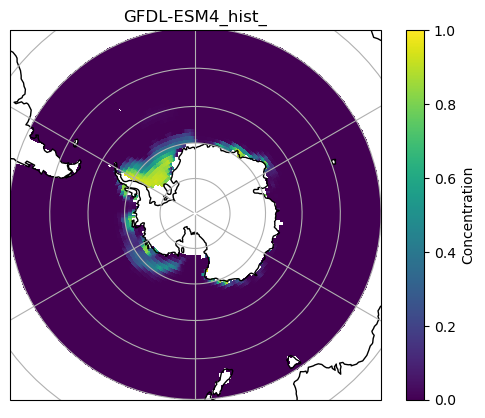

La variable 'siconc' est en %. Conversion en fraction.


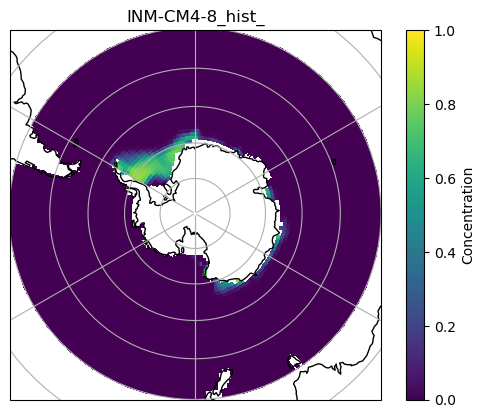

La variable 'siconc' est en %. Conversion en fraction.


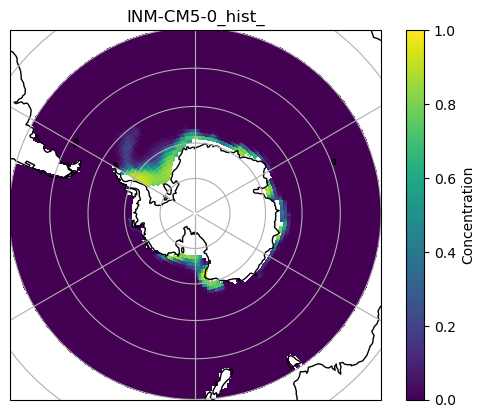

La variable 'siconc' est en %. Conversion en fraction.


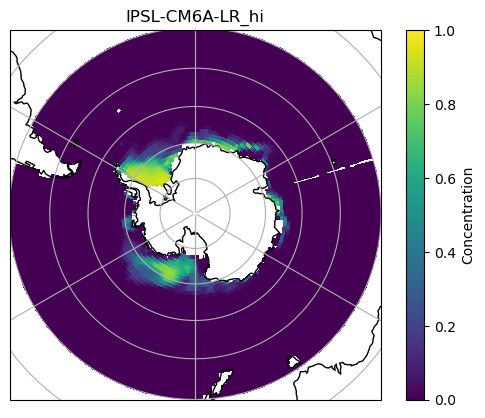

La variable 'siconc' est en %. Conversion en fraction.


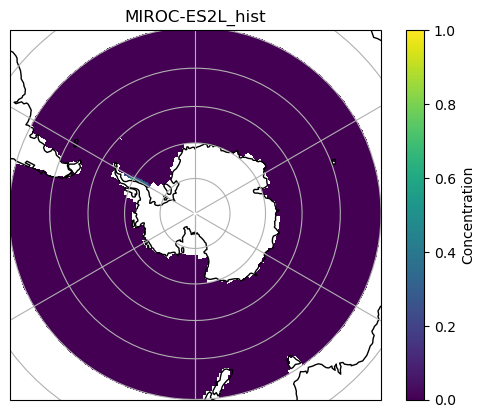

La variable 'siconc' est en %. Conversion en fraction.


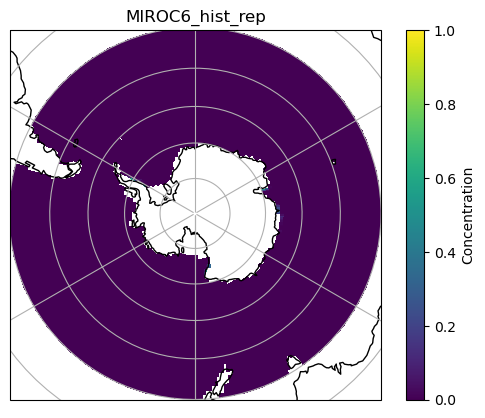

La variable 'siconc' est en %. Conversion en fraction.


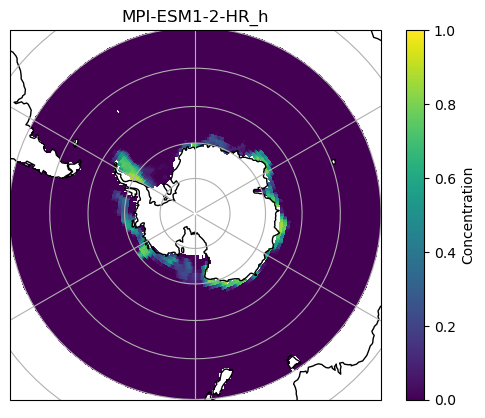

La variable 'siconc' est en %. Conversion en fraction.


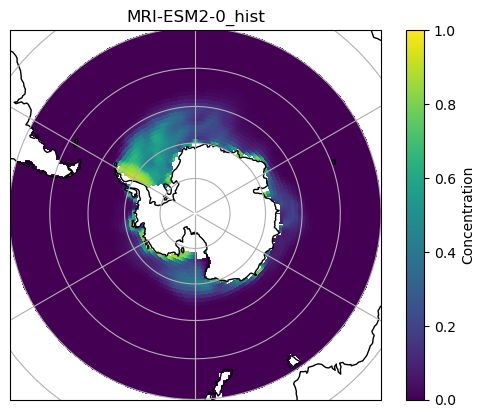

La variable 'siconc' est en %. Conversion en fraction.


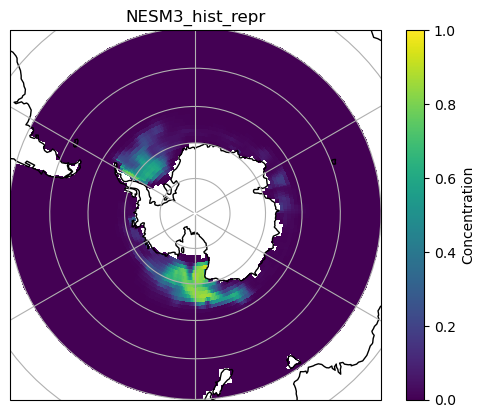

In [9]:
seaice_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_siconc = os.path.join("/home/jovyan/private-storage/output_data/sea_ice_interp/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/output_data/areacella_recalcule", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", files.replace("hist", "sftlf"))
                                 
    # use of functions defined in the module
    ds_siconc, ds_area, ds_sftlf = get_data(path_siconc, path_areacella, path_sftlf)
    siconc, seaice_cover, monthly_mean = extraction_variable_and_monthly_mean_sh(ds_siconc, sftlf=ds_sftlf["sftlf"])
    areacella = ds_area["cell_area"]
    seaice_cover_km2 = seaice_surface_calculation(seaice_cover, areacella)
    seaice_cover_dict[model_name] = seaice_cover_km2

    plot_seaice_cover_basic_sh(siconc, title=files[:15])
    
    ds_siconc.close()
    ds_area.close()

In [10]:
seaice_cover_dict

{'BCC-CSM2-MR': <xarray.DataArray (month: 12)> Size: 96B
 array([ 1585214.68002473,   640095.8878261 ,  1490791.4574588 ,
         4276746.54793996,  8814783.18625482, 12575459.3939286 ,
        15073299.43861234, 16504374.98886286, 16887720.88525448,
        16397995.39498603, 14719105.29158753,  9439645.39161113])
 Coordinates:
   * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
     type     |S7 7B b'sea_ice',
 'CAMS-CSM1-0': <xarray.DataArray (month: 12)> Size: 96B
 array([3.48746067e+04, 5.77156134e+03, 4.06054006e+04, 1.21798250e+06,
        4.83761363e+06, 1.01006586e+07, 1.41545278e+07, 1.68957999e+07,
        1.78921563e+07, 1.72658509e+07, 1.26315682e+07, 3.40061838e+06])
 Coordinates:
   * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
     type     |S7 7B b'sea_ice',
 'CESM2': <xarray.DataArray (month: 12)> Size: 96B
 array([ 7367822.2820951 ,  2830316.07211754,  3605662.38530455,
         6999918.2070857 , 10437923.44866801, 13011923.77071089,
        1489128

In [11]:
# save the dictionary as a csv file
dictionnaire_to_csv(seaice_cover_dict, "/home/jovyan/private-storage/output_data/seaice_cover_sh_per_model.csv")

✅ Fichier CSV sauvegardé : /home/jovyan/private-storage/output_data/seaice_cover_sh_per_model.csv


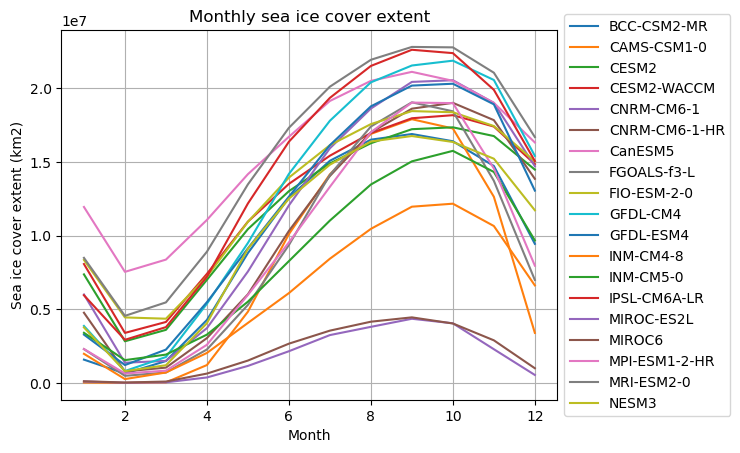

In [12]:
# plot the sea ice cover extent for all the models
for model, values in seaice_cover_dict.items():
    values.plot(label=model)

plt.title("Monthly sea ice cover extent")
plt.xlabel("Month")
plt.ylabel("Sea ice cover extent (km2)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

## Conclusion

This notebook therefore presented the sea ice cover fraction for each model in the form of a map and made it possible to calculate the average monthly surface area in km2 during the reference period and to extract these values in the form of a csv file, for the two hemispheres.